In [1]:
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
kyochon_=openpyxl.load_workbook('kyochon.xlsx')
goobnae_=openpyxl.load_workbook('goobnae.xlsx')
naenae_=openpyxl.load_workbook('naenae.xlsx')
norang_=openpyxl.load_workbook('norang.xlsx')
zicoba_=openpyxl.load_workbook('zicoba.xlsx')
pericana_=openpyxl.load_workbook('pericana.xlsx')
bbq_=openpyxl.load_workbook('BBQ.xlsx')
bhc_=openpyxl.load_workbook('BHC.xlsx')
cheogotjip_=openpyxl.load_workbook('cheogotjip.xlsx')

In [3]:
#taste=['단짠','맵고','매콤','달달','달짝지근','짭짤']
neg_plus_front=['안 ','안','덜 ','덜']
neg_plus_back=['하지 않','하진 않','하지는 않']

neg_spicy=['맵지 않','맵진 않','맵지는 않']
neg_sweet=['달지 않','달진 않','달지는 않']
neg_salty=['짜지 않','짜진 않','짜지는 않']

#minus_sweet=['리뷰를 달','리뷰 달','리뷰 다','리뷰다'] #앞 음절에 리뷰 라는 단어가 들어가면 count에서 제외
#minus_salty=['진짜네','진짜다'] ##진+dict_salty ('진짜네','진짜다') count에서 제외

In [4]:
dict_spicy=['매콤','맵다','맵싹','매웠','매워','맵고','맵네','맵습','맵긴','맵기','맵더라','매운']
dict_basak=['바삭','겉바속촉','빠삭']#겉바속촉도 단짠처럼 따로 빼야하나?
dict_dambek=['담백']
dict_sweet=['달콤','달달','달짝지근','달고','단맛','달았','달아']#(-)리뷰+달고,달아,달았,..
dict_salty=['짜다','짠맛','짭짤','짜네','짭','짜더라','짰','짜긴','짜고','짭쪼름','짭조름'] #(-)진짜네,진짜다
dict_oily=['느끼']
dict_choc=['촉촉']
dict_sweetsalty=['단짠']
#dict_garilc=['갈릭','마늘'] #새로운 제외기준 필요

In [5]:
col=['spicy','basak','dambek','sweet','salty','oily','choc','sweetsalty']
neg_taste=['neg_spicy',False,False,neg_sweet,neg_salty,False,False,False]
#delete_keywords=[False,False,False,minus_sweet,minus_salty,False,False,False]

In [6]:
#dictionary
taste_dictionary=dict()
taste_dictionary[col[0]]=dict_spicy
taste_dictionary[col[1]]=dict_basak
taste_dictionary[col[2]]=dict_dambek
taste_dictionary[col[3]]=dict_sweet
taste_dictionary[col[4]]=dict_salty
taste_dictionary[col[5]]=dict_oily
taste_dictionary[col[6]]=dict_choc
taste_dictionary[col[7]]=dict_sweetsalty

In [7]:
taste_dictionary

{'spicy': ['매콤',
  '맵다',
  '맵싹',
  '매웠',
  '매워',
  '맵고',
  '맵네',
  '맵습',
  '맵긴',
  '맵기',
  '맵더라',
  '매운'],
 'basak': ['바삭', '겉바속촉', '빠삭'],
 'dambek': ['담백'],
 'sweet': ['달콤', '달달', '달짝지근', '달고', '단맛', '달았', '달아'],
 'salty': ['짜다', '짠맛', '짭짤', '짜네', '짭', '짜더라', '짰', '짜긴', '짜고', '짭쪼름', '짭조름'],
 'oily': ['느끼'],
 'choc': ['촉촉'],
 'sweetsalty': ['단짠']}

In [8]:
def negative_words_dictionary(taste_dict,neg_taste=False): #negative dictionary 만들기
    neg_dict=[]
    
    for i in taste_dict:
        for j in neg_plus_front:
            neg_dict.append(j+i)
        
    for i in taste_dict:
        for j in neg_plus_back:
            neg_dict.append(i+j)
            
    if neg_taste != False:
        for i in neg_taste:
            neg_dict.append(i)
            
    return neg_dict

In [9]:
def contain_review(dataset,taste_dict): #만들었던 dictionary의 단어들이 포함되는 리뷰 뽑아내기
    contain_review=[]
#    count=0
    #print(type(dataset))
    for i in range(len(dataset)):
        #print('length of dataset',len(dataset))
        review=dataset[0].iloc[i]
        for j in taste_dict:
            if j in review:
                #count+=1
                #print(count)                    
                contain_review.append(review)
                break
    #print("review contained:",contain_review)
    
    return contain_review

### 1. consider only positive review

In [10]:
def remove_neg_review(dataset,taste_dict,neg_taste=False):
    neg_dict=negative_words_dictionary(taste_dict,neg_taste) #negative dictionary
    review_contained=contain_review(dataset,taste_dict)#만들었던 dictionary의 단어들이 포함되는 리뷰 뽑아내기
    temp=[]
    for i in range(len(review_contained)):#dictionary 단어 포함 리뷰 중 negative dictionary에 있는 단어를 포함하는 리뷰 제거
        for j in neg_dict:
            if j in review_contained[i]:
                #print(i,end="\n\n")
                temp.append(i)
                break
                
    #for j in temp:
    #    review_contained.remove(review_contained(j))
    for i in sorted(temp, reverse=True):
        del review_contained[i]

    
    #print('review deleted: ', len(review_contained))
    #print('removed negative review: ',contained_review)
    return review_contained

In [11]:
def taste_scoring_by_menu_1(dataset,taste_dict,neg_taste=False):
    count_review=remove_neg_review(dataset,taste_dict,neg_taste)
    
    return (len(count_review)/len(dataset))

### 2. + for pos and - for neg

In [12]:
def remove_neg_review_2(dataset,taste_dict,neg_taste=False):
    neg_dict=negative_words_dictionary(taste_dict,neg_taste) #negative dictionary
    #print('negative dictionary :', neg_dict)
    review_contained=contain_review(dataset,taste_dict)#만들었던 dictionary의 단어들이 포함되는 리뷰 뽑아내기
    #print('review contained: ',len(review_contained))
    temp=[]
    for i in range(len(review_contained)):#dictionary 단어 포함 리뷰 중 negative dictionary에 있는 단어를 포함하는 리뷰 제거
        for j in neg_dict:
            if j in review_contained[i]:
                #print(i,end="\n\n")
                temp.append(i)
                break
                
    #for j in temp:
    #    review_contained.remove(review_contained(j))

    accessed_mapping=map(review_contained.__getitem__,temp)
    review_neg=list(accessed_mapping)

    review_pos=review_contained
    for i in sorted(temp, reverse=True):
        del review_pos[i]
    
    #print('removed negative review: ',contained_review)
    return review_pos,review_neg

In [13]:
def taste_scoring_by_menu_2(dataset,taste_dict,neg_taste=False):
    #positive review count
    count_pos_review,count_neg_review=remove_neg_review_2(dataset,taste_dict,neg_taste)
    #print('(+):',len(count_pos_review),'(-):',len(count_neg_review),'length of dataset:',len(dataset))
    plus=len(count_pos_review)
    minus=len(count_neg_review)
    score=(plus-minus)/len(dataset)
    #print('score:',score)
    
    return score

### 3. weight

In [14]:
burden_plus_front=['개','너무','완전','진짜','대박','ㄹㅇ','찐','찐으로','많이','마니']
burden_negative=['전혀','별로','하나도','진짜','너무','ㄹㅇ']

In [15]:
def burden(expression): #negative dictionary 만들기
    burden_dict=[]
    
    for i in expression:
        for j in burden_plus_front:
            burden_dict.append(j+i)
    
    for i in expression:
        for j in burden_plus_front:
            burden_dict.append(j+' '+i)
        
            
    return burden_dict

In [16]:
#a=burden(dict_spicy)
#a

In [17]:
def remove_neg_review_3(dataset,taste_dict,neg_taste=False):
    neg_dict=negative_words_dictionary(taste_dict,neg_taste) #negative dictionary
    #print('negative dictionary :', neg_dict)
    review_contained=contain_review(dataset,taste_dict)#만들었던 dictionary의 단어들이 포함되는 리뷰 뽑아내기
    #print('review contained: ',len(review_contained))
    index_negreview=[]
    for i in range(len(review_contained)):#dictionary 단어 포함 리뷰 중 negative dictionary에 있는 단어를 포함하는 리뷰 제거
        for j in neg_dict:
            if j in review_contained[i]:
                #print(i,end="\n\n")
                index_negreview.append(i)
                break
                
    #for j in temp:
    #    review_contained.remove(review_contained(j))

    accessed_mapping=map(review_contained.__getitem__,index_negreview)
    review_neg=list(accessed_mapping)

    review_pos=review_contained
    for i in sorted(index_negreview, reverse=True):
        del review_pos[i]
        
    #positive review -> 그냥 positive review // burden positive review
    burden_pos=burden(taste_dict)
    index_burden_pos=[]
    for i in range(len(review_pos)):#dictionary 단어 포함 리뷰 중 burden dict에 있는 단어를 포함하는 리뷰 제거
        for j in burden_pos:
            if j in review_pos[i]:
                #print(i,end="\n\n")
                index_burden_pos.append(i)
                break
    
    accessed_mapping_burden=map(review_pos.__getitem__,index_burden_pos)
    review_burden_pos=list(accessed_mapping_burden)
    for i in sorted(index_burden_pos, reverse=True):
        del review_pos[i]
    
    #negative review -> 그냥 negative review // burden negative review
    burden_neg=burden(neg_dict)
    index_burden_neg=[]
    for i in range(len(review_neg)):#dictionary 단어 포함 리뷰 중 burden dict에 있는 단어를 포함하는 리뷰 제거
        for j in burden_neg:
            if j in review_neg[i]:
                #print(i,end="\n\n")
                index_burden_neg.append(i)
                break
    
    accessed_mapping_burden_neg=map(review_neg.__getitem__,index_burden_neg)
    review_burden_neg=list(accessed_mapping_burden_neg)
    for i in sorted(index_burden_neg, reverse=True):
        del review_neg[i]
    
    #print('removed negative review: ',contained_review)
    return review_pos,review_neg,review_burden_pos,review_burden_neg

In [18]:
def taste_scoring_by_menu_3(dataset,taste_dict,neg_taste=False):
    #positive review count
    pos_review,neg_review,burden_pos_review,burden_neg_review=remove_neg_review_3(dataset,taste_dict,neg_taste)
    pos_score=(len(pos_review)+2*len(burden_pos_review))
    neg_score=(len(neg_review)+2*len(burden_neg_review))
    score=(pos_score+neg_score)/len(dataset)
    
    return score

## Feature Scoring

In [19]:
reviewdata=pd.DataFrame()

In [20]:
def preprocessing(reviewset):
    reviewset=reviewset.worksheets[0]
    data=[]
    for row in reviewset.rows:
        data.append([row[0].value,row[1].value,row[2].value,row[3].value])
    reviewset=pd.DataFrame(data)
    reviewset=reviewset.drop_duplicates()
    return reviewset

In [21]:
reviewdata=pd.concat([preprocessing(kyochon_),preprocessing(norang_),preprocessing(naenae_),preprocessing(zicoba_),preprocessing(pericana_)
                      ,preprocessing(bbq_),preprocessing(cheogotjip_),preprocessing(goobnae_),preprocessing(bhc_)],ignore_index=True)

In [22]:
reviewdata

,0,1,2,3
0,교촌치킨_교촌,배달도 빠르고 좋았습니다,5,5
1,교촌치킨_교촌,튀김이 예술입니다. 정말 잘튀겨졌어요. 그리고 양념도 골고루 잘 베어있어 너무 맛있...,5,5
2,교촌치킨_교촌,교촌치킨은 역시 윙인것 같아요! 치킨도 맛있고 꽈배기도 맛있네요.,5,5
3,교촌치킨_교촌,배달도 빠르고 맛있었어요,5,5
4,교촌치킨_교촌,맛있었어요 근데 좀 마니 빠삭?해요ㅎㅎ\n잘먹었습니다 서비스로 주신 꽈베기는 진짜...,5,4
...,...,...,...,...
157192,BHC_후라이드,다 먹어 버렸따.....⭐ 믿고먹는 BHC였으나 점바점을 알려준집....ㅠㅠ 시킨지...,4,3
157193,BHC_후라이드,맛있게 먹었습이다 감사합니다,5,5
157194,BHC_후라이드,맛나게먹었어요!감사합니다,5,5
157195,BHC_후라이드,소스 4개 감사합니다,0,0


In [23]:
# menu list
menu=reviewdata.iloc[:,0].values
menu=np.unique(menu)
menu=menu.tolist()
#menu

In [24]:
len(menu)

171

In [25]:
menu=[i for i in menu if len(reviewdata[reviewdata[0]==i])>20] 
#리뷰 수 20개 이하인 애들 없애줬다!... 리뷰 수가 좀 더 많았으면 좋겠..따
len(menu) #메뉴 개수:141->90

116

In [26]:
review_by_menu=dict()
for i in menu:
    review_by_menu[i]=len(reviewdata[reviewdata[0]==i])
#review_by_menu

In [27]:
reviewdata[1].index

RangeIndex(start=0, stop=157197, step=1)

In [28]:
reviewdata[1]

0                                             배달도 빠르고 좋았습니다
1         튀김이 예술입니다. 정말 잘튀겨졌어요. 그리고 양념도 골고루 잘 베어있어 너무 맛있...
2                      교촌치킨은 역시 윙인것 같아요! 치킨도 맛있고 꽈배기도 맛있네요.
3                                             배달도 빠르고 맛있었어요
4         맛있었어요  근데 좀 마니 빠삭?해요ㅎㅎ\n잘먹었습니다 서비스로 주신 꽈베기는 진짜...
                                ...                        
157192    다 먹어 버렸따.....⭐ 믿고먹는 BHC였으나 점바점을 알려준집....ㅠㅠ 시킨지...
157193                                      맛있게 먹었습이다 감사합니다
157194                                        맛나게먹었어요!감사합니다
157195                                          소스 4개 감사합니다
157196              쿠폰 써서 저렴하게 먹었어요 동네 프랜차이즈 중에 제일 나은 것 같아요
Name: 1, Length: 157197, dtype: object

In [29]:
def review_delkey(reviewdata_):
    reviewdata=reviewdata_.copy()
    reviewdata.dropna()
    del_key=['리뷰를 달','리뷰 달','리뷰 다','리뷰다']
    
    
    for i in range(len(reviewdata)):
        review=reviewdata.iloc[i][1]
        #print('review',review)
        #print(i)
        for words in del_key:
            
            if words in review:
                review=review.replace(words,' ')
                #print('review',review)
                reviewdata.iloc[i][1]=review
                
    return reviewdata

In [30]:
#pd.option_context('display.float_format', '{:0.20f}'.format)
df1=pd.DataFrame(columns=col,index=menu)
df2=pd.DataFrame(columns=col,index=menu)
df3=pd.DataFrame(columns=col,index=menu)

**전체 data로 나눠주기 scoring**

for menu_name in menu:
    data=reviewdata[reviewdata[0]==menu_name]
    data=pd.DataFrame(data)
    #print(type(data),len)
    
    print(menu_name)
    count=0
    for taste in col:
        print(taste)
        df1[taste].loc[menu_name]=taste_scoring_by_menu_1(data,taste_dictionary.get(taste),neg_taste[count])
        count+=1

In [31]:
def scoring1_among_tasteReviews(reviewdata,menu,taste_dictionary,neg_taste):
    
    df1=pd.DataFrame(columns=col,index=menu)
    print(reviewdata)
    reviewdata=review_delkey(reviewdata)
    
    for menu_name in menu:
        data=reviewdata[reviewdata[0]==menu_name]
        #print(data.shape)
        data=pd.DataFrame(data.to_numpy())
        
        taste_all=sum(list(taste_dictionary.values()),[])
        #print(taste_all)
        AllTasteReview=[]
        for i in range(len(data)):
            review=data[1].iloc[i]
            #review=pd.DataFrame(review)
            for j in taste_all:
                if j in review:
                    #count+=1
                    #print(count)                    
                    AllTasteReview.append(review)
                    break
        #print(menu_name,'AllTasteReview',len(AllTasteReview),'type',type(AllTasteReview))
        AllTasteReview=pd.DataFrame(AllTasteReview)

        if len(AllTasteReview)<10:
            continue
        
    
        #print(menu_name)
        count=0
        for taste in col:
            #print(taste)
            df1[taste].loc[menu_name]=taste_scoring_by_menu_1(AllTasteReview,taste_dictionary.get(taste),neg_taste[count])
            count+=1
            
    df1=df1.dropna()
    return df1

In [32]:
df1=scoring1_among_tasteReviews(reviewdata,menu,taste_dictionary,neg_taste)

               0                                                  1  2  3
0        교촌치킨_교촌                                      배달도 빠르고 좋았습니다  5  5
1        교촌치킨_교촌  튀김이 예술입니다. 정말 잘튀겨졌어요. 그리고 양념도 골고루 잘 베어있어 너무 맛있...  5  5
2        교촌치킨_교촌               교촌치킨은 역시 윙인것 같아요! 치킨도 맛있고 꽈배기도 맛있네요.  5  5
3        교촌치킨_교촌                                      배달도 빠르고 맛있었어요  5  5
4        교촌치킨_교촌  맛있었어요  근데 좀 마니 빠삭?해요ㅎㅎ\n잘먹었습니다 서비스로 주신 꽈베기는 진짜...  5  4
...          ...                                                ... .. ..
157192  BHC_후라이드  다 먹어 버렸따.....⭐ 믿고먹는 BHC였으나 점바점을 알려준집....ㅠㅠ 시킨지...  4  3
157193  BHC_후라이드                                    맛있게 먹었습이다 감사합니다  5  5
157194  BHC_후라이드                                      맛나게먹었어요!감사합니다  5  5
157195  BHC_후라이드                                        소스 4개 감사합니다  0  0
157196  BHC_후라이드            쿠폰 써서 저렴하게 먹었어요 동네 프랜차이즈 중에 제일 나은 것 같아요  0  0

[157197 rows x 4 columns]


<ipython-input-29-c000b6addec1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewdata.iloc[i][1]=review


In [33]:
df1

,spicy,basak,dambek,sweet,salty,oily,choc,sweetsalty
BBQ극한왕갈비,0.347826,0.289855,0,0.246377,0.144928,0.057971,0,0.0289855
BBQ마라핫,0.78125,0.0625,0,0.03125,0.09375,0,0,0
BBQ매달구,0.9,0,0,0.5,0.1,0,0,0
BBQ메이플버터갈릭,0.0555556,0.333333,0.0555556,0.388889,0,0.444444,0.111111,0.111111
BBQ바삭칸,0.0357143,0.892857,0.0357143,0.0178571,0,0.0714286,0,0
...,...,...,...,...,...,...,...,...
처갓집_핫슈프림양념,0.708333,0.125,0,0.0416667,0.0166667,0.216667,0.00833333,0
처갓집_후라이드,0.045977,0.781609,0.045977,0,0.0114943,0.091954,0.045977,0
페리카나_누꼬,0.588235,0.117647,0,0.137255,0.117647,0.0392157,0,0.0392157
페리카나_로스핀,0.9,0.05,0,0.1,0.05,0.05,0,0


In [34]:
df1=df1.dropna()
df1['spicy'].isnull().value_counts()

False    93
Name: spicy, dtype: int64

In [35]:
#taste_all

In [36]:
#len(AllTasteReview)

In [37]:
df1

,spicy,basak,dambek,sweet,salty,oily,choc,sweetsalty
BBQ극한왕갈비,0.347826,0.289855,0,0.246377,0.144928,0.057971,0,0.0289855
BBQ마라핫,0.78125,0.0625,0,0.03125,0.09375,0,0,0
BBQ매달구,0.9,0,0,0.5,0.1,0,0,0
BBQ메이플버터갈릭,0.0555556,0.333333,0.0555556,0.388889,0,0.444444,0.111111,0.111111
BBQ바삭칸,0.0357143,0.892857,0.0357143,0.0178571,0,0.0714286,0,0
...,...,...,...,...,...,...,...,...
처갓집_핫슈프림양념,0.708333,0.125,0,0.0416667,0.0166667,0.216667,0.00833333,0
처갓집_후라이드,0.045977,0.781609,0.045977,0,0.0114943,0.091954,0.045977,0
페리카나_누꼬,0.588235,0.117647,0,0.137255,0.117647,0.0392157,0,0.0392157
페리카나_로스핀,0.9,0.05,0,0.1,0.05,0.05,0,0


In [38]:
#scoring1=df1.copy()
#scoring1.reset_index(drop=True, inplace=False)

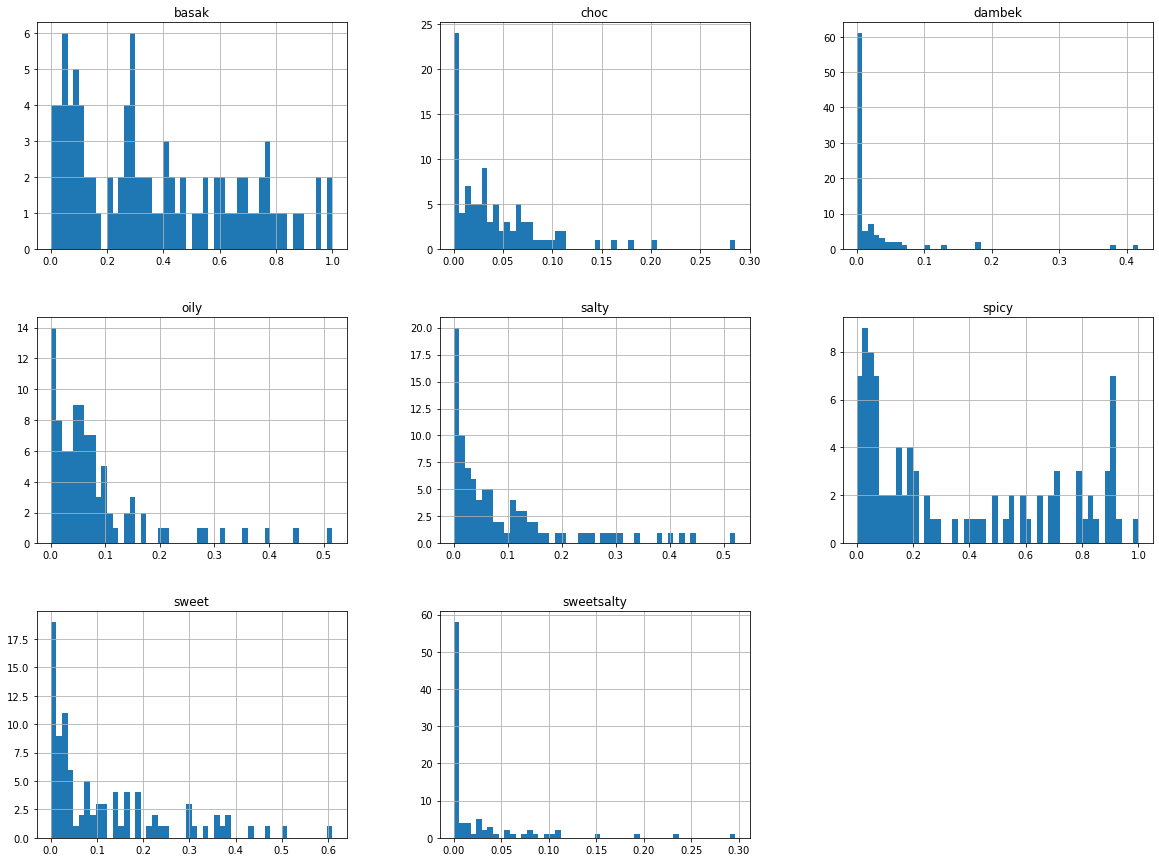

In [39]:
df1=df1.apply(pd.to_numeric)
df1.hist(bins=50, figsize=(20,15))
plt.show()

In [40]:
# 0 value가 나오는 메뉴 개수 
print('zero values per each taste')
for i in col:
    print(i,':',(df1[i]==0).sum(),'=>',(df1[i]==0).sum()*100/len(menu),'%')

zero values per each taste
spicy : 5 => 4.310344827586207 %
basak : 2 => 1.7241379310344827 %
dambek : 50 => 43.10344827586207 %
sweet : 15 => 12.931034482758621 %
salty : 18 => 15.517241379310345 %
oily : 12 => 10.344827586206897 %
choc : 23 => 19.82758620689655 %
sweetsalty : 51 => 43.96551724137931 %


In [41]:
def scoring2_among_tasteReviews(reviewdata,menu,taste_dictionary,neg_taste):
    
    df=pd.DataFrame(columns=col,index=menu)
    reviewdata=review_delkey(reviewdata)
    
    for menu_name in menu:
        data=reviewdata[reviewdata[0]==menu_name]
        #print(data.shape)
        data=pd.DataFrame(data.to_numpy())
        
        taste_all=sum(list(taste_dictionary.values()),[])
        #print(taste_all)
        AllTasteReview=[]
        for i in range(len(data)):
            review=data[1].iloc[i]
            #review=pd.DataFrame(review)
            for j in taste_all:
                if j in review:
                    #count+=1
                    #print(count)                    
                    AllTasteReview.append(review)
                    break
        #print(menu_name,'AllTasteReview',len(AllTasteReview),'type',type(AllTasteReview))
        AllTasteReview=pd.DataFrame(AllTasteReview)

        if len(AllTasteReview)<10:
            continue
        
    
        ##print(menu_name)
        count=0
        for taste in col:
            #print(taste)
            df[taste].loc[menu_name]=taste_scoring_by_menu_2(AllTasteReview,taste_dictionary.get(taste),neg_taste[count])
            count+=1
            
    df=df.dropna()
    return df

In [42]:
df2=scoring2_among_tasteReviews(reviewdata,menu,taste_dictionary,neg_taste)

<ipython-input-29-c000b6addec1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewdata.iloc[i][1]=review


In [43]:
df2

,spicy,basak,dambek,sweet,salty,oily,choc,sweetsalty
BBQ극한왕갈비,0.275362,0.289855,0,0.246377,0.144928,0.057971,0,0.0289855
BBQ마라핫,0.6875,0.03125,0,0.03125,0.09375,0,0,0
BBQ매달구,0.9,0,0,0.5,0.1,0,0,0
BBQ메이플버터갈릭,0.0555556,0.333333,0.0555556,0.388889,0,0.388889,0.111111,0.111111
BBQ바삭칸,0.0357143,0.857143,0.0357143,0.0178571,0,0.0714286,0,0
...,...,...,...,...,...,...,...,...
처갓집_핫슈프림양념,0.666667,0.125,0,0.0416667,0.0166667,0.2,0.00833333,0
처갓집_후라이드,0.045977,0.758621,0.045977,0,0,0.045977,0.045977,0
페리카나_누꼬,0.568627,0.117647,0,0.137255,0.117647,0.0392157,0,0.0392157
페리카나_로스핀,0.9,0.05,0,0.1,0.05,0.05,0,0


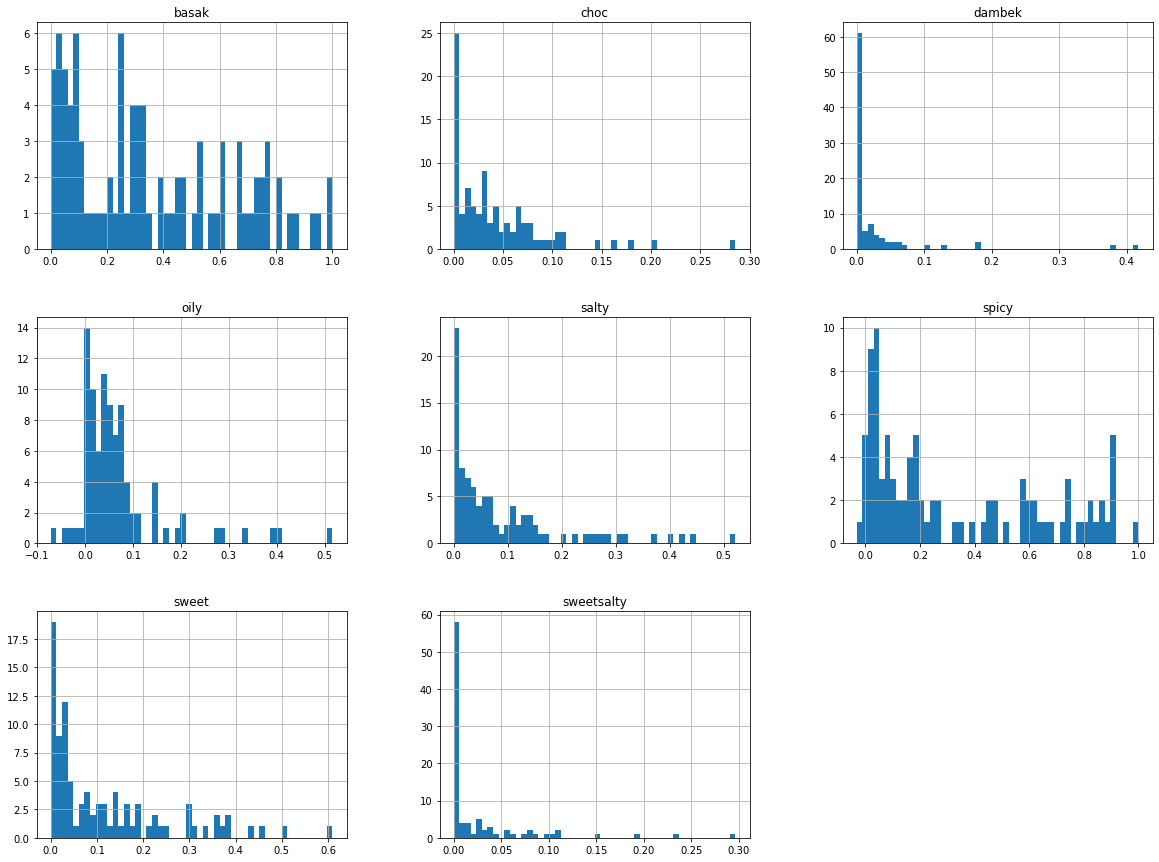

In [44]:
df2=df2.apply(pd.to_numeric)
df2.hist(bins=50, figsize=(20,15))
plt.show()

In [45]:
def scoring3_among_tasteReviews(reviewdata,menu,taste_dictionary,neg_taste):
    
    df=pd.DataFrame(columns=col,index=menu)
    reviewdata=review_delkey(reviewdata)
    
    for menu_name in menu:
        data=reviewdata[reviewdata[0]==menu_name]
        #print(data.shape)
        data=pd.DataFrame(data.to_numpy())
        
        taste_all=sum(list(taste_dictionary.values()),[])
        #print(taste_all)
        AllTasteReview=[]
        for i in range(len(data)):
            review=data[1].iloc[i]
            #review=pd.DataFrame(review)
            for j in taste_all:
                if j in review:
                    #count+=1
                    #print(count)                    
                    AllTasteReview.append(review)
                    break
        #print(menu_name,'AllTasteReview',len(AllTasteReview),'type',type(AllTasteReview))
        AllTasteReview=pd.DataFrame(AllTasteReview)

        if len(AllTasteReview)<10:
            continue
        
    
        ##print(menu_name)
        count=0
        for taste in col:
            #print(taste)
            df[taste].loc[menu_name]=taste_scoring_by_menu_3(AllTasteReview,taste_dictionary.get(taste),neg_taste[count])
            count+=1
            
    df=df.dropna()
    return df

In [46]:
df3=scoring3_among_tasteReviews(reviewdata,menu,taste_dictionary,neg_taste)

<ipython-input-29-c000b6addec1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewdata.iloc[i][1]=review


In [47]:
df3

,spicy,basak,dambek,sweet,salty,oily,choc,sweetsalty
BBQ극한왕갈비,0.449275,0.333333,0,0.275362,0.144928,0.057971,0,0.0289855
BBQ마라핫,0.96875,0.09375,0,0.03125,0.125,0,0,0
BBQ매달구,0.9,0,0,0.5,0.1,0,0,0
BBQ메이플버터갈릭,0.0555556,0.333333,0.0555556,0.5,0,0.555556,0.111111,0.111111
BBQ바삭칸,0.0357143,1.01786,0.0357143,0.0178571,0,0.0892857,0,0
...,...,...,...,...,...,...,...,...
처갓집_핫슈프림양념,0.783333,0.125,0,0.0416667,0.0166667,0.241667,0.0166667,0
처갓집_후라이드,0.045977,0.862069,0.045977,0,0.0229885,0.137931,0.045977,0
페리카나_누꼬,0.627451,0.117647,0,0.156863,0.137255,0.0392157,0,0.0392157
페리카나_로스핀,0.9,0.05,0,0.1,0.05,0.05,0,0


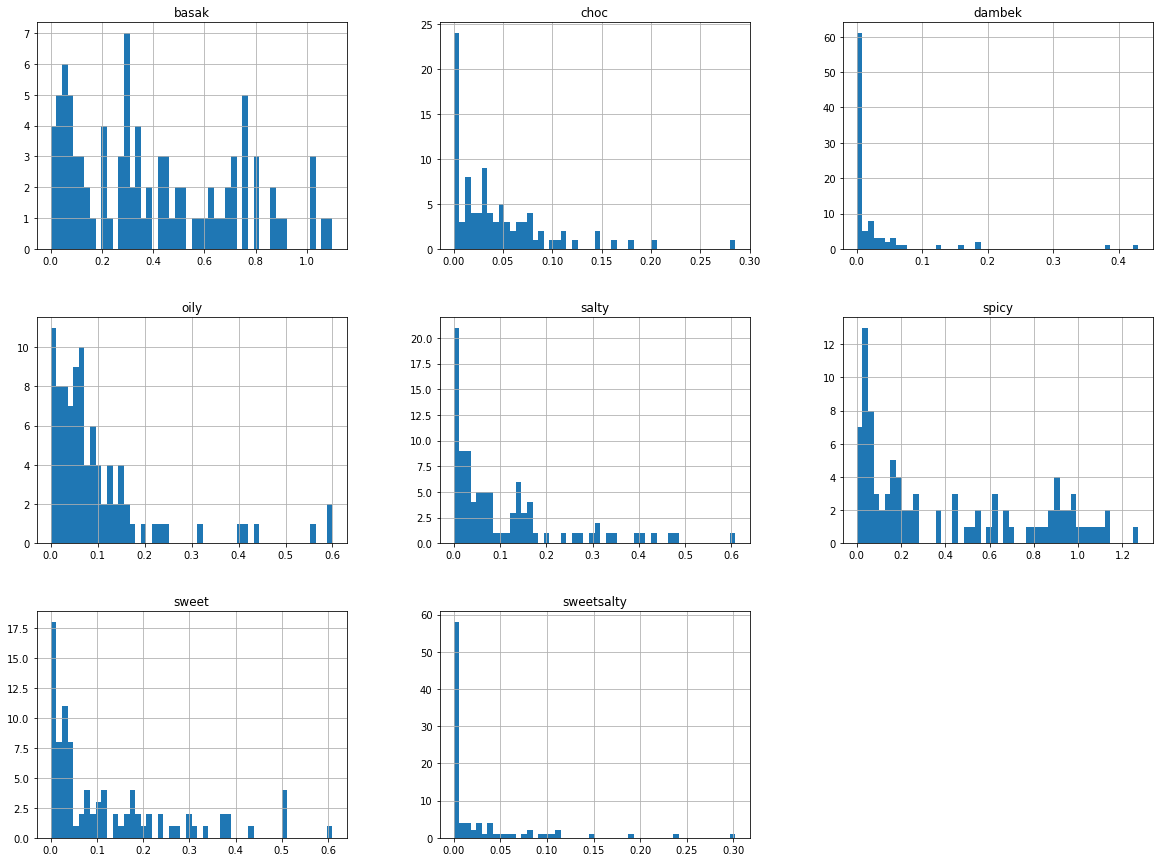

In [48]:
df3=df3.apply(pd.to_numeric)
df3.hist(bins=50, figsize=(20,15))
plt.show()

data=reviewdata[reviewdata[0]=='BHC_맛초킹']
data=pd.DataFrame(data)
taste_all=sum(list(taste_dictionary.values()),[])
del_key=['리뷰를 달','리뷰 달','리뷰 다','리뷰다''진짜네','진짜다']

count=0
AllTasteReview=[]
for i in range(len(data)) :
    review=data[1].iloc[i]
    for j in taste_all:
        if j in review:
            count+=1
            print('count:',count)
            AllTasteReview.append(review)
            break
print('AllTasteReview:',AllTasteReview,'length: ',len(AllTasteReview))


for menu_name in menu:
    data=reviewdata[reviewdata[0]==menu_name]
    data=pd.DataFrame(data)
    #print(type(data),len)
    
    #print(menu_name)
    count=0
    for taste in col:
        #print(taste)
        df2[taste].loc[menu_name]=taste_scoring_by_menu_2(data,taste_dictionary.get(taste),neg_taste[count],delete_keywords[count])
        count+=1

for menu_name in menu:
    data=reviewdata[reviewdata[0]==menu_name]
    data=pd.DataFrame(data)
    #print(type(data),len)
    
    #print(menu_name)
    count=0
    for taste in col:
        #print(taste)
        df3[taste].loc[menu_name]=taste_scoring_by_menu_3(data,taste_dictionary.get(taste),neg_taste[count],delete_keywords[count])
        count+=1

### 지원언니가 만든 함수

In [57]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot  as plt
from sklearn.metrics import silhouette_score
from scipy.spatial import distance


def kmedoids_order(k_,df,chicken_name): 
    feature=df.reset_index(drop=True)
    # print(feature)
    temp_dis=[]
    
    k = k_
    # create model and prediction
#     model = KMeans(n_clusters=k,algorithm='auto')
    model = KMedoids(n_clusters=k)
    
    #kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)

    
    model.fit(feature)
    predict = pd.DataFrame(model.predict(feature))
    predict.columns=['predict']
    
    # input으로 넣은 치킨의 맛 별 score
    data=df[df.index==chicken_name] 
        
    temp=df.index
    index_chicken=temp.get_loc(chicken_name)
    label=predict[predict.index==index_chicken].predict
    # 같은 클러스터에 있는 치킨들의 인덱스 
    all_chicken_within_cluster=predict[predict==label.tolist()].dropna().index
    

    # euclidian distance 계산 
    for i in range(len(all_chicken_within_cluster)):
        other_in_cluster=feature[feature.index==all_chicken_within_cluster[i]]

        other=np.array(other_in_cluster)
        mine=np.array(data)
        temp_dis.append(distance.euclidean(other,mine))

            
    # top 5    
    sorted_euclidian=np.flip(np.sort(temp_dis))
    sorted_index=np.argsort(temp_dis)
    temp_array=np.flip(sorted_index)[0:5]

    
    # from operator import itemgetter
    # print(list(itemgetter(*temp_array)(temp)))
    
    # top 5에 해당하는 치킨 print 
    return df.index[temp_array]

In [58]:
print(kmedoids_order(5,df1,'BHC_레드킹'))

Index(['BHC_레드킹', 'BBQ마라핫', 'BBQ바삭칸', 'BHC_뿌링맵소킹', 'BBQ매달구'], dtype='object')


In [59]:
print(kmedoids_order(5,df2,'BHC_레드킹'))

Index(['BBQ마라핫', 'BBQ바삭칸', 'BHC_맛초킹', 'BHC_뿌링클핫', 'BHC_갈비레오'], dtype='object')


In [60]:
print(kmedoids_order(5,df3,'BHC_레드킹'))

Index(['BBQ메이플버터갈릭', 'BBQ마라핫', 'BBQ스모크', 'BHC_마라칸', 'BBQ써프라이드'], dtype='object')


### Define PCA function

In [49]:
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids
def Pca(dataframe,k): # k는 주성분의 갯수 
    pca1=PCA(n_components=k)
    pca1.fit(dataframe)
    dataframe_=pd.DataFrame(pca1.transform(dataframe),index=df1.index.tolist())
    return dataframe_

### Define Cluster function

In [50]:
from sklearn.cluster import KMeans, AgglomerativeClustering
# from sklearn_extra.cluster.KMedoids import KMedoids
import matplotlib.pyplot  as plt
from sklearn.metrics import silhouette_score
from scipy.spatial import distance

In [73]:
def Cluster(df,k,method,pca,pca_k=0):  #method : k-means, agglomerative, k : numer of clusters , pca : true or false
                                            #pca_k : reducted dimension after pca
    
    if pca==True:
        df=Pca(df,pca_k)

    df_p=pd.DataFrame()
    
    if method=='kmeans':
        model=KMeans(k)
        model.fit(df)
        df_c=pd.DataFrame(model.predict(df),index=df.index)
        df_c.columns=['cluster']
        return pd.concat([df,df_c],axis=1)
        
    elif method=='agglomerative':
        model=AgglomerativeClustering(k)
        df_c=pd.DataFrame(model.fit_predict(df),index=df.index)
        df_c.columns=['cluster']
        return pd.concat([df,df_c],axis=1)
    
    elif method=='kmedoids':
        model=KMedoids(k)
        model.fit(df)
        df_c=pd.DataFrame(model.predict(df),index=df.index)
        df_c.columns=['cluster']
        return pd.concat([df,df_c],axis=1)
        
    else:
        print(error)
        return
    

In [74]:
Cluster(df1,6,'kmedoids',True,3)

,0,1,2,cluster
BBQ극한왕갈비,0.045830,0.119958,0.000936,3
BBQ마라핫,0.527909,-0.077510,0.070670,5
BBQ매달구,0.664869,0.141548,-0.142197,5
BBQ메이플버터갈릭,-0.230333,0.380045,-0.269415,2
BBQ바삭칸,-0.569400,-0.258304,-0.067969,4
...,...,...,...,...
처갓집_핫슈프림양념,0.423313,-0.042581,-0.054953,3
처갓집_후라이드,-0.496344,-0.190019,-0.047639,4
페리카나_누꼬,0.340538,0.050392,0.040638,3
페리카나_로스핀,0.628081,-0.089589,-0.014988,5


In [75]:
def remove_lastcolumn(df):  #remove last column of pandas DataFrame
    return df.iloc[:,0:df.shape[1]-1]

In [76]:
def top_k_nearest(df,name,k): #name : 특정 치킨, k : k개를 출력해줌
    
    dim=df.shape[1]-1 #feature dimension
    
    
    name_v=remove_lastcolumn(df[df.index==name]).to_numpy().reshape(dim) #name의 feature들, name의 feature vector, 'dim' dimension numpy vector
    name_index=df.index.get_loc(name) #name의 index
    in_same_clust=df[df['cluster']==df.iloc[name_index]['cluster']] #pandas dataframe 같은 클러스터에 속해있는
    in_same_clust=in_same_clust.drop(index=name)
    in_same_clust=remove_lastcolumn(in_same_clust)
    #print(in_same_clust)
    
    dist=[]
    for i in in_same_clust.index:
        another_v=in_same_clust.loc[i].to_numpy() #name과 같은 cluster에속한 대상중 한놈의 feature vector
        dist.append(distance.euclidean(name_v,another_v))
        
    sorted_dist=np.sort(dist) #작은놈부터 큰놈으로
    sorted_index=np.argsort(dist) #작은놈 인덱스부터 큰놈 인덱스로
    if len(dist)<k:
        return in_same_clust.index[sorted_index[0:len(dist)-1]].tolist()
    else:
        return in_same_clust.index[sorted_index[0:k]].tolist()

In [77]:
top_k_nearest(Cluster(df1,6,'kmeans',True,3),'BBQ극한왕갈비',5)

['굽네치킨_오리지널', 'BHC_블랙올리브', 'BBQ시크릿양념', 'BHC_양념', '굽네치킨_양념']

***돌릴때마다 결과 다르게 나옴 (clustering initial point가 달라서)***

In [78]:
results=[]
for _ in range(100):
    i=top_k_nearest(Cluster(df1,6,'kmeans',True,3),'BBQ극한왕갈비',5)
    if i not in results:
        results.append(i)        


print(results)
print(len(results))

[['교촌치킨_레드', '처갓집_와락간장', 'BBQ써프라이드', 'BBQ핫황금올리브크리스피', 'BHC_치레카'], ['BHC_치하오', '교촌치킨_레드', '처갓집_와락간장', 'BHC_소이바베큐', '지코바_소금'], ['BHC_치하오', 'BHC_소이바베큐', '지코바_소금', 'BHC_갈비레오', '페리카나_누꼬'], ['교촌치킨_레드', '처갓집_와락간장', 'BBQ써프라이드', 'BBQ핫황금올리브크리스피', 'BHC_핫후라이드'], ['굽네치킨_오리지널', 'BHC_블랙올리브', 'BBQ시크릿양념', 'BHC_양념', '굽네치킨_양념'], ['BHC_치하오', '교촌치킨_레드', 'BHC_소이바베큐', '지코바_소금', 'BHC_갈비레오']]
6


In [79]:
results[1][1]

'교촌치킨_레드'

In [88]:
import operator

In [107]:
def recommend_chicken(menu_input,k):
    bools=[True,False]
    methods=['kmeans','agglomerative','kmedoids']
    dfs=[df1,df2,df3]
    
    results=[]
    for i in bools:
        for j in methods:
            for l in dfs:
                count = top_k_nearest(Cluster(l,6,j,i,3),menu_input,k)
                results.append(count)
                
    #print(results)            
    menu_list = [item for sublist in results for item in sublist]
    menu_list = list(set(menu_list))
    #print(menu_list)
    
    scoring=dict()
    for menu_name in menu_list:
        scoring[menu_name]=0
    
    for idx in range(len(results)):
        for rank in range(k):
            menu_name=results[idx][rank]
            scoring[menu_name]+=(k-rank)
            
    sorted_scoring=sorted(scoring.items(),key=operator.itemgetter(1),reverse=True)
    output=[]
    for i in sorted_scoring[0:k]:
        output.append(i[0])
    return output
    #return sorted_scoring.items()[0:k]
    
    

In [129]:
recommend_chicken('BHC_갈비레오',5)

['페리카나_누꼬', 'BHC_소이바베큐', '굽네치킨_갈비천왕', '지코바_소금', '굽네치킨_스윗볼케이노']

In [113]:
menu

['BBQ극한왕갈비',
 'BBQ마라핫',
 'BBQ매달구',
 'BBQ메이플버터갈릭',
 'BBQ바삭칸',
 'BBQ뱀파이어',
 'BBQ빠리',
 'BBQ소이갈릭스',
 'BBQ스모크',
 'BBQ시크릿양념',
 'BBQ써프라이드',
 'BBQ오리지날양념',
 'BBQ자메이카통다리구이',
 'BBQ치즐링',
 'BBQ크래커',
 'BBQ핫황금올리브블랙페퍼',
 'BBQ핫황금올리브찐킹소스',
 'BBQ핫황금올리브크리스피',
 'BBQ허니버터갈릭스',
 'BBQ황금올리브',
 'BBQ황금올리브속안심',
 'BBQ황금올리브양념',
 'BBQ황금올리브한깐풍',
 'BHC_간장골드',
 'BHC_갈비레오',
 'BHC_골드킹',
 'BHC_레드킹',
 'BHC_마라칸',
 'BHC_맛초킹',
 'BHC_매운맛양념',
 'BHC_맵스터',
 'BHC_바삭클',
 'BHC_블랙올리브',
 'BHC_빠텐더',
 'BHC_뿌링맵소킹',
 'BHC_뿌링클',
 'BHC_뿌링클핫',
 'BHC_소이바베큐',
 'BHC_양념',
 'BHC_양념맵소킹',
 'BHC_치레카',
 'BHC_치바고',
 'BHC_치하오',
 'BHC_커리퀸',
 'BHC_포테킹후라이드',
 'BHC_핫갈비레오',
 'BHC_핫소이바베큐',
 'BHC_핫후라이드',
 'BHC_후라이드',
 '교촌치킨_교촌',
 '교촌치킨_교촌라이스세트',
 '교촌치킨_교촌리얼후라이드',
 '교촌치킨_교촌신화',
 '교촌치킨_교촌치즈트러플',
 '교촌치킨_교촌후라이드',
 '교촌치킨_레드',
 '교촌치킨_살살치킨',
 '교촌치킨_소이살살',
 '교촌치킨_허니',
 '굽네치킨_갈릭마왕',
 '굽네치킨_갈비천왕',
 '굽네치킨_고추바사삭',
 '굽네치킨_딥치즈',
 '굽네치킨_마라볼케이노',
 '굽네치킨_볼케이노',
 '굽네치킨_스윗볼케이노',
 '굽네치킨_양념',
 '굽네치킨_양념히어로',
 '굽네치킨_오리지널',
 '굽네치킨_폭립',
 '굽네치킨_핫갈비천왕',
 '굽네치킨_허니멜로',
 '굽네치킨_후르츄소이갈릭',
 '